Your solution should have the following steps:

1- Exploratory data analysis: check columns to understand datatypes, value ranges, find possible missing values, the correlation between features, and create relevant data visualization

2- Linear learner: create an ML pipeline with a linear model. Explicitly mention your model assumptions and what you did to make sure those assumptions hold

3- non-linear model: also fit a non-linear model of your choice to compare the result

4- ensemble model: use any of the discussed ensemble methods to create a new model based on step 2 and 3

5- Use the model from step 4 to create a fucntion called credit_approval that takes a single row of data and predict if a credit card will be granted or not. It should looklike something like below.

In [253]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [254]:
!conda install --yes scikit-learn

Solving environment: done

# All requested packages already installed.



In [256]:
!conda install --yes seaborn

Solving environment: done

# All requested packages already installed.



In [257]:
import sklearn

In [258]:
#Import data

df = pd.read_csv('data/crx.data', 
                 header=None, 
                 names=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"])
print(df.head())
df

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  00202    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  00280  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  00100    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  00120    0   +


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# 1. Exploratory data analysis
## 1-1 Understand datatypes

In [259]:
#data type
print(df.info())

#total 690 entries
#3 types of data: float64, int64, object.
#float64, int64 is numeric data, object is non-numeric data
#--> numeric data: A3, A8, A11, A15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


## 1-2 Value ranges

In [261]:
#stats of numeric data
print(df.describe())
#found out min/max value ranges on numeric data

               A3          A8        A11            A15
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


## 1-3 Find possible missing values

In [262]:
#find missing value
df.isnull().values.sum()

0

In [263]:
#find missing value2
#Change '?' to nan
df = df.replace('?', np.nan)

#find 'nan' value
print(str(df.isnull().values.sum()))
print(df.isnull().sum())
#--> Total 67 missing values

67
A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


In [264]:
#37 cases of missing data
null_data = df.isnull().values.any(axis=1).sum()
print(null_data)

37


In [265]:
#handling missing data

# Iterate over each column of df
for col in df:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df1 = df.fillna(df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print('Total missing values:' + str(df.isnull().values.sum()))
print('Missing values in each column:')
df1.isnull().sum()


Total missing values:67
Missing values in each column:


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [267]:
#converting non-numeric data to numeric data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df1:
    if df1[col].dtypes =='object':
        le.fit(df1[col])
        df1[col]=le.transform(df1[col])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    int64  
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 86.4 KB


## 1-4 Create relevant data visualization

In [268]:
df2 = df1.filter(items=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"])
print(df2)

     A1   A2      A3  A4  A5  A6  A7    A8  A9  A10  A11  A12  A13  A14  A15
0     2  157   0.000   2   1  13   8  1.25   1    1    1    0    0   69    0
1     1  329   4.460   2   1  11   4  3.04   1    1    6    0    0   12  560
2     1   90   0.500   2   1  11   4  1.50   1    0    0    0    0   97  824
3     2  126   1.540   2   1  13   8  3.75   1    1    5    1    0   32    3
4     2   44   5.625   2   1  13   8  1.71   1    0    0    0    2   38    0
..   ..  ...     ...  ..  ..  ..  ..   ...  ..  ...  ...  ...  ...  ...  ...
685   2   53  10.085   3   3   5   4  1.25   0    0    0    0    0   91    0
686   1   72   0.750   2   1   2   8  2.00   0    1    2    1    0   68  394
687   1   98  13.500   3   3   6   3  2.00   0    1    1    1    0   68    1
688   2   21   0.205   2   1   1   8  0.04   0    0    0    0    0   97  750
689   2  198   3.375   2   1   2   4  8.29   0    0    0    1    0    1    0

[690 rows x 15 columns]


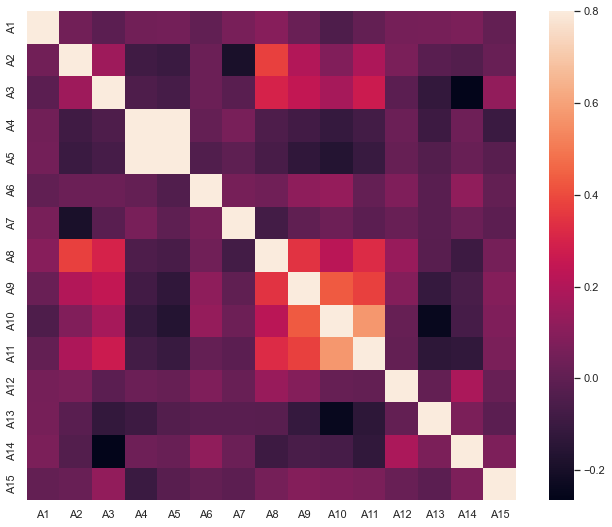

In [269]:
#correlation matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

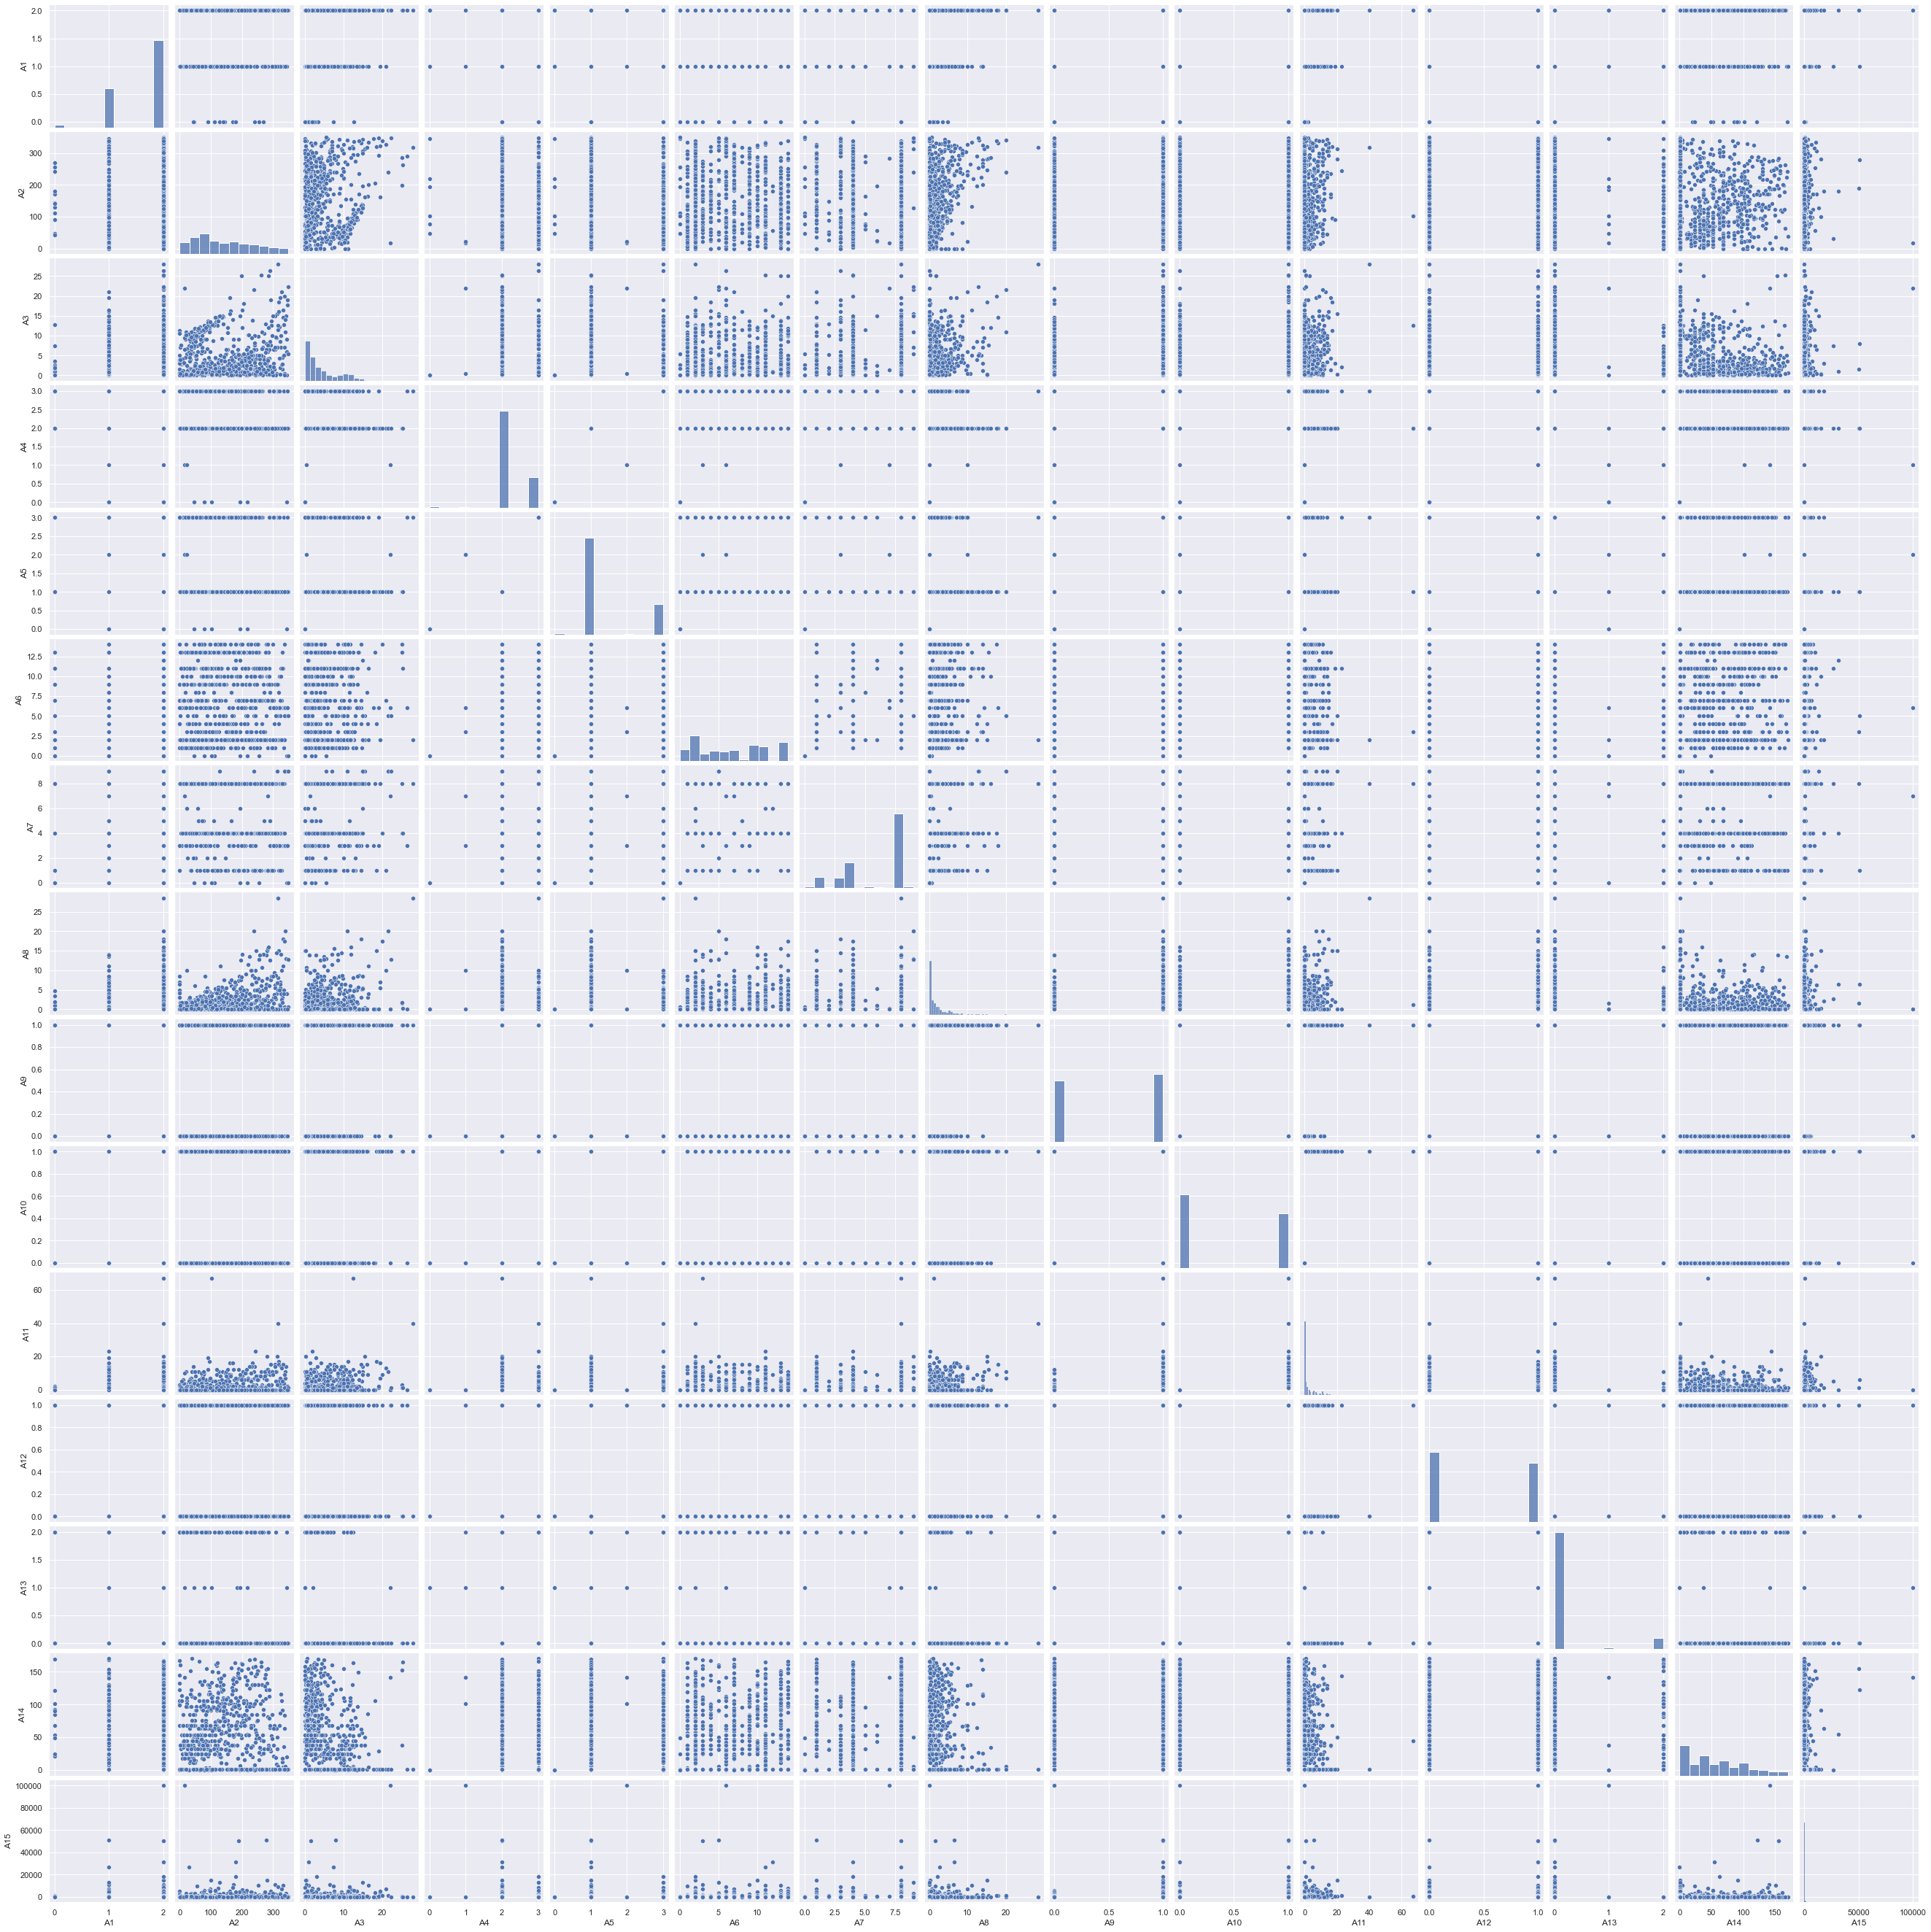

In [271]:
sns.set()
cols = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"]
sns.pairplot(df2[cols])
plt.show();

<AxesSubplot:xlabel='A16', ylabel='count'>

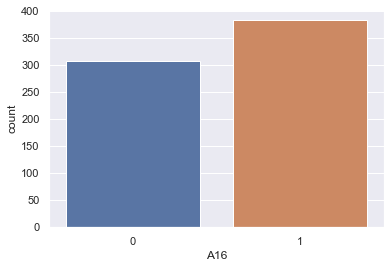

In [270]:
sns.countplot(data = df1, x = 'A16')
#0=approved, 1=denied

In [272]:
df3 = df1.filter(items=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A13","A15", "A16"])
print(df3.head())
df3 = df3.values


X,y = df3[:,0:13], df3[:,13]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

   A1   A2     A3  A4  A5  A6  A7    A8  A9  A10  A11  A13  A15  A16
0   2  157  0.000   2   1  13   8  1.25   1    1    1    0    0    0
1   1  329  4.460   2   1  11   4  3.04   1    1    6    0  560    0
2   1   90  0.500   2   1  11   4  1.50   1    0    0    0  824    0
3   2  126  1.540   2   1  13   8  3.75   1    1    5    0    3    0
4   2   44  5.625   2   1  13   8  1.71   1    0    0    2    0    0


In [273]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.77, random_state=42)

In [274]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [275]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.8646616541353384


array([[207,  25],
       [ 47, 253]])

In [276]:
from sklearn.model_selection import GridSearchCV

tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol=tol, max_iter=max_iter)
print(param_grid)

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}


In [277]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

grid_model_result = grid_model.fit(rescaledX, y)

#results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.852174 using {'max_iter': 100, 'tol': 0.01}
